# PCA

In [1]:
! pip install --quiet --upgrade nltk > /dev/null

In [2]:
import nltk
nltk.download('all', quiet=True)

True

In [3]:
import pandas as pd
import os
import csv
import nltk
import string

In [4]:
# Identify the working directory and data files
working_directory = "33-PCA-tsne-KMeans-DBSCAN"

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [5]:
df = pd.read_pickle("./21-Preprocess-Combined-Data-v2/dataframe.pickle")

In [6]:
verification_row = 9
n_components = 25

In [7]:
# make a tag for this run
import datetime

TAG = f"{datetime.datetime.now():%Y_%m_%d_%s}"

In [8]:
scores = {}

In [9]:
df.shape

(5736, 20)

In [10]:
df.head()

ROW_ID                                           FOI_TEXT  \
0  1969025  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...   
1  1426265  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   
2  2609625  IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...   
3  2813837  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   
4  1337517  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   

  DEVICE_PROBLEM_CODE             DEVICE_PROBLEM_TEXT  \
0                3283  Wireless Communication Problem   
1                3283  Wireless Communication Problem   
2                1435                No Device Output   
3                3283  Wireless Communication Problem   
4                3283  Wireless Communication Problem   

                 GENERIC_NAME DEVICE_REPORT_PRODUCT_CODE          UDI-DI  \
0  CONTINUOUS GLUCOSE MONITOR                        QBJ                   
1  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
2  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
3  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
4  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   

       UDI-PUBLIC DATE_OF_EVENT REPORTER_OCCUPATION_CODE REPORT_DATE  \
0                    07/30/2020                      000               
1  00386270000385    06/05/2020                      000               
2  00386270000385    10/05/2020                      000               
3  00386270000385    10/23/2020                      000               
4  00386270000385    05/25/2020                      000               

  EVENT_LOCATION SOURCE_TYPE  \
0              I    CONSUMER   
1              I    CONSUMER   
2              I    CONSUMER   
3              I    CONSUMER   
4              I    CONSUMER   

                                      TOKENIZED_TEXT  \
0  [it, was, reported, that, the, transmitter, lo...   
1  [it, was, reported, that, signal, loss, over, ...   
2  [it, was, reported, that, transmitter, failed,...   
3  [it, was, reported, that, signal, loss, over, ...   
4  [it, was, reported, that, signal, loss, over, ...   

                                        NOPUNCT_TEXT  \
0  [it, was, reported, that, the, transmitter, lo...   
1  [it, was, reported, that, signal, loss, over, ...   
2  [it, was, reported, that, transmitter, failed,...   
3  [it, was, reported, that, signal, loss, over, ...   
4  [it, was, reported, that, signal, loss, over, ...   

                                    NOSTOPWORDS_TEXT  \
0  [reported, transmitter, lost, connection, pump...   
1  [reported, signal, loss, one, hour, occurred, ...   
2  [reported, transmitter, failed, error, occurre...   
3  [reported, signal, loss, one, hour, occurred, ...   
4  [reported, signal, loss, one, hour, occurred, ...   

                                       NODIGITS_TEXT  \
0  [reported, transmitter, lost, connection, pump...   
1  [reported, signal, loss, one, hour, occurred, ...   
2  [reported, transmitter, failed, error, occurre...   
3  [reported, signal, loss, one, hour, occurred, ...   
4  [reported, signal, loss, one, hour, occurred, ...   

                                            POS_TEXT  \
0  [(reported, VBN), (transmitter, NN), (lost, VB...   
1  [(reported, VBN), (signal, JJ), (loss, NN), (o...   
2  [(reported, VBN), (transmitter, NN), (failed, ...   
3  [(reported, VBN), (signal, JJ), (loss, NN), (o...   
4  [(reported, VBN), (signal, JJ), (loss, NN), (o...   

                                     LEMMATIZED_TEXT  \
0  [report, transmitter, lose, connection, pump, ...   
1  [report, signal, loss, one, hour, occur, produ...   
2  [report, transmitter, fail, error, occur, data...   
3  [report, signal, loss, one, hour, occur, revie...   
4  [report, signal, loss, one, hour, occur, produ...   

                                        STEMMED_TEXT  
0  [report, transmitt, lost, connect, pump, great...  
1  [report, signal, loss, one, hour, occur, produ...  


In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# create a DataFrame for the sentences
sentences_df = pd.DataFrame(
    columns=[
        'SENTENCE_ID',
        'SENTENCE', 
        'ROW_ID', 
        'FOI_TEXT', 
        'DEVICE_PROBLEM_CODE',
        'DEVICE_PROBLEM_TEXT'
    ]
)

# Iterate over every row in the FOI_TEXT DataFrame
# and create a new dataframe with a row for each sentence.
# Each row will have a sentence, the orginal ROW_ID, and the
# FOI_TEXT that it came from along with the DEVICE_PROBLEM_CODE and
# DEVICE_PROBLEM_TEXT from the orginal FOI_TEXT
sentence_counter = 0

for index, row in df.iterrows():
    for sentence in nltk.sent_tokenize(row['FOI_TEXT']):
        sentence_data = {
            'SENTENCE': sentence,
            'SENTENCE_ID': sentence_counter,
            'ROW_ID': row['ROW_ID'], 
            'FOI_TEXT': row['FOI_TEXT'], 
            'DEVICE_PROBLEM_CODE': row['DEVICE_PROBLEM_CODE'],
            'DEVICE_PROBLEM_TEXT': row['DEVICE_PROBLEM_TEXT']
        }
        sentence_data_df = pd.DataFrame(sentence_data, index=[sentence_counter])
        sentences_df = pd.concat([sentences_df, sentence_data_df])
        sentence_counter = sentence_counter + 1        

In [13]:
sentences_df.shape

(25686, 6)

In [14]:
sentences_df.head()

SENTENCE_ID                                           SENTENCE   ROW_ID  \
0           0  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...  1969025   
1           1  THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...  1969025   
2           2  NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...  1969025   
3           3  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...  1426265   
4           4    NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.  1426265   

                                            FOI_TEXT DEVICE_PROBLEM_CODE  \
0  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283   
1  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283   
2  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283   
3  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...                3283   
4  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...                3283   

              DEVICE_PROBLEM_TEXT  
0  Wireless Communication Problem  
1  Wireless Communication Problem  
2  Wireless Communication Problem  
3  Wireless Communication Problem  
4  Wireless Communication Problem

In [15]:
sentences_df['SENTENCE'][verification_row]

'THE PROBABLE CAUSE COULD NOT BE DETERMINED.'

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Process the sentences
import re
import nltk
import string

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def process_sentence(sentence):
    # Lowercase the sentence
    sentence = sentence.lower()

    # Remove any words that start with a digit
    sentence = re.sub(r'\b\d\w*\b', '', sentence)

    # Remove punctuation
    sentence_tokens = sentence.split()
    sentence_tokens = [token.translate(str.maketrans("", "", string.punctuation)) for token in sentence_tokens]

    # Remove stopwords
    sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
    sentence = ' '.join(sentence_tokens)

    return sentence

sentences_df['PROCESSED_SENTENCE'] = sentences_df['SENTENCE'].apply(process_sentence)

In [18]:
sentences_df['PROCESSED_SENTENCE'][verification_row]

'probable cause could determined'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [20]:
%pip install --upgrade --quiet sentence-transformers hdbscan mpld3 sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sentence_transformers import SentenceTransformer

# define the document embedding model
# https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embedded_sentences = embedder.encode(sentences_df['PROCESSED_SENTENCE'])
embedded_sentences

array([[ 0.00797196,  0.06402366,  0.01412311, ...,  0.01263433,
        -0.09277472, -0.0401257 ],
       [-0.02872896,  0.01099847,  0.0145125 , ...,  0.03422188,
        -0.02442264, -0.04160525],
       [ 0.00838424,  0.05963197, -0.03641187, ...,  0.03092055,
        -0.00812463, -0.0049395 ],
       ...,
       [-0.06312984,  0.09404121, -0.02415263, ..., -0.01254782,
         0.10541873,  0.04489081],
       [ 0.00619849, -0.01331595,  0.05153756, ..., -0.06092134,
         0.00186172, -0.06808806],
       [ 0.03530972,  0.06425514,  0.06098982, ..., -0.06081251,
         0.06142472,  0.04099741]], dtype=float32)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# "np.array([i for i in df['EMBED']])" Converts the data into a 2d array
embedded_sentences_scaled = scaler.fit_transform(np.array([i for i in embedded_sentences]))

In [23]:
embedded_sentences_scaled

array([[0.5719789 , 0.6762022 , 0.4889078 , ..., 0.55340743, 0.36013085,
        0.40519148],
       [0.4158448 , 0.45435464, 0.49014124, ..., 0.61890954, 0.53317845,
        0.40002647],
       [0.57373285, 0.65782815, 0.3288343 , ..., 0.60889244, 0.57444024,
        0.52802426],
       ...,
       [0.26949558, 0.80179   , 0.3676664 , ..., 0.47699833, 0.861899  ,
        0.70197856],
       [0.5644342 , 0.3526276 , 0.60742104, ..., 0.33022082, 0.5997228 ,
        0.30757672],
       [0.68828   , 0.67717063, 0.63736176, ..., 0.33055103, 0.750519  ,
        0.688387  ]], dtype=float32)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_sentences = vectorizer.fit_transform(sentences_df['PROCESSED_SENTENCE'])
vectorized_sentences

<25686x1050 sparse matrix of type '<class 'numpy.float64'>'
	with 134036 stored elements in Compressed Sparse Row format>

In [25]:
# Combine the embeddings and vectorized sentences into a single feature matrix
feature_matrix = pd.concat([pd.DataFrame(embedded_sentences_scaled), pd.DataFrame(vectorized_sentences.toarray())], axis=1)

In [26]:
feature_matrix.shape

(25686, 1434)

In [27]:
# importing libraries to use
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [28]:
# Performing PCA with 10 components
pca = PCA(n_components=10)

# applying pca on the data
pca.fit(feature_matrix)

# getting pca components
pca_components = pca.fit_transform(feature_matrix)

# getting explained variance ratio
explained_var = pca.explained_variance_ratio_

# making components
components = ['PC' + str(i) for i in range(1, len(explained_var)+1)]

# Creating a dataframe of the explained variance ratio for each component
ev_df = pd.DataFrame({'Component': components, 'Explained Variance Ratio': explained_var})
ev_df = ev_df.sort_values(by='Explained Variance Ratio', ascending=False)

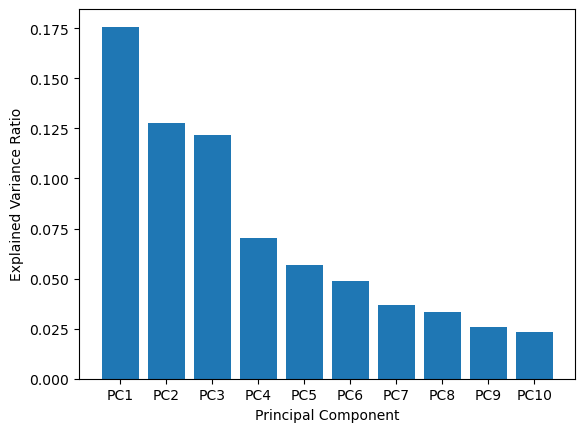

In [29]:
# Ploting the explained variance ratio for each component
plt.bar(ev_df['Component'], ev_df['Explained Variance Ratio'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Text(0, 0.5, 'Explained Variance')

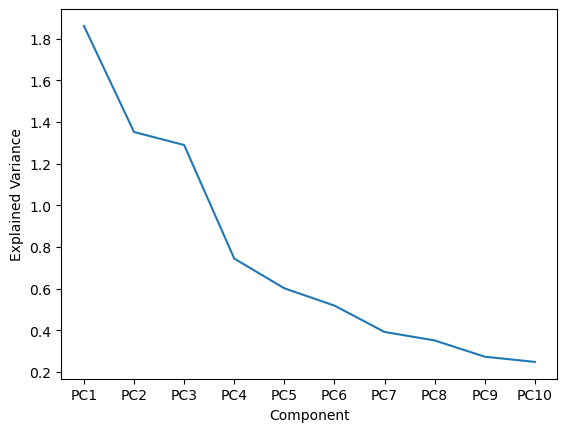

In [30]:
# making a line chart to visualize the explained variance
components_name = ev_df['Component']
sns.lineplot(x=components_name,y=pca.explained_variance_)
plt.ylabel("Explained Variance")

In [31]:
# Calculate the total explained variance
total_explained_variance = sum(pca.explained_variance_)

print(f"Total explained variance: {total_explained_variance*10:.4f}")

Total explained variance: 76.3063


In [32]:
cumulative_explained_variance_df = pd.DataFrame(
    {
        'Number of Components': range(1, len(np.cumsum(pca.explained_variance_)) + 1),
        'Cumulative Explained Variance': np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    }
)

cumulative_explained_variance_df

Number of Components  Cumulative Explained Variance
0                     1                           17.6
1                     2                           30.4
2                     3                           42.6
3                     4                           49.6
4                     5                           55.3
5                     6                           60.2
6                     7                           63.9
7                     8                           67.2
8                     9                           69.8
9                    10                           72.1

In [33]:
import plotly.express as px

fig_1 = px.line(cumulative_explained_variance_df, x='Number of Components', y='Cumulative Explained Variance', title=f"PCA using Sentences - Variance Explained | {working_directory} {TAG}\n")

# add markers for each point
fig_1.update_traces(mode='lines+markers')

# extend the limits of the y-axis from 0 to 90
fig_1.update_yaxes(range=[0, 90])

# extend the limits of the x-axis from 0 to 16
fig_1.update_xaxes(range=[0, 11])

# add a horizontal rule for y = 80
fig_1.add_shape(type='line',
              x0=0,
              y0=80,
              x1=27,
              y1=80,
              line=dict(color='red', width=2, dash='dash'))

# show all numbers on the x-axis
fig_1.update_layout(xaxis=dict(tickmode='linear'))

# write the graph to a file in the working directory
fig_1.write_html(f"{working_directory}/pca_explained_variance_with_{n_components}_components_{TAG}.html")

# show the plot
fig_1.show()

In [34]:
# Choosing the  3 principal components
pca = PCA(n_components=3)

# applying on data
pca.fit(feature_matrix)

# converting data
pca_df = pd.DataFrame(pca.transform(feature_matrix), columns=['PC1', 'PC2', 'PC3'])

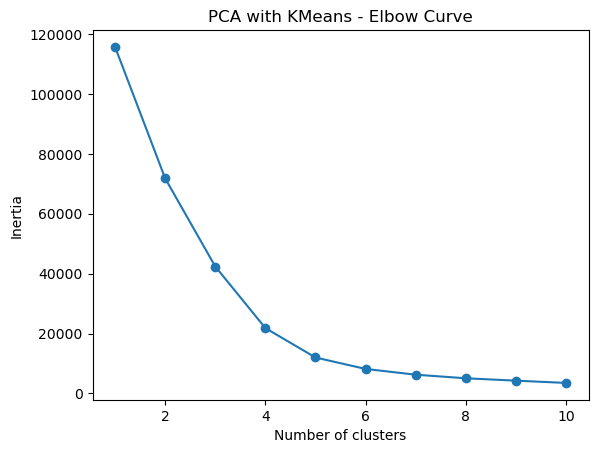

In [35]:
# making an empty list to store inertia for each cluster
inertias = []

# Performing KMeans clustering with 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

# Ploting the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.title("PCA with KMeans - Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- After 5 clusters the change in inertia is not significant

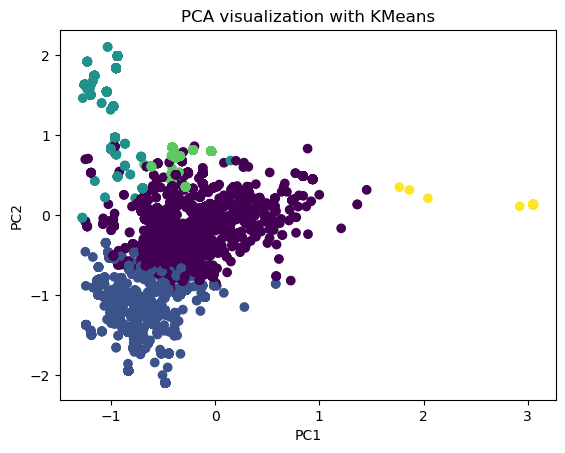

In [36]:
# Choose the number of clusters based on the elbow method 
kmeans = KMeans(n_clusters=5, random_state=42)

# applying the kmeans clustering on the dataset obtained after applying pca for 3 components
kmeans.fit(pca_df)

# getting labels
y_pred_pca = kmeans.fit_predict(pca_df)
kmeans_labels = kmeans.labels_

# Visualize the clustering results in 2D using the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_labels)
plt.title("PCA visualization with KMeans")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1. A score of 1 indicates that the object is perfectly matched to its own cluster, and a score of -1 indicates that the object is better matched to a different cluster.

In [37]:
# Compute the silhouette score
score = silhouette_score(pca_df, y_pred_pca)
scores["Kmeans with PCA"] = score

print("Silhouette Score for Kmeans with PCA: ",score)

Silhouette Score for Kmeans with PCA:  0.6229034428085346


In [38]:
# adding cluster labels to the sentence df
sentences_df["PCA_CLUSTER"] = kmeans_labels

# DBSCAN with PCA

In [39]:
eps =         [.75, .5, .31, .31, .75, 1, 1, 0.5, 2, 2, 3, 3]
min_samples = [  2,  2,   2,   4,   4, 2, 4,   4, 2, 4, 2, 4]

dbscan_pca_collection = []
dbscan_pca_labels_collection = []

for i in range(0, len(eps)):
    # Performing DBSCAN clustering
    dbscan_pca_collection.append(DBSCAN(eps=eps[i], min_samples=eps[i]))

    # getting labels for components obtained after applying pca
    dbscan_pca_labels_collection.append(dbscan_pca_collection[i].fit_predict(pca_df))
    
    # adding cluster labels to the sentence df
    sentences_df[f"PCA_DBSCAN_CLUSTER_{eps[i]}_{eps[i]}"] = dbscan_pca_labels_collection[i]

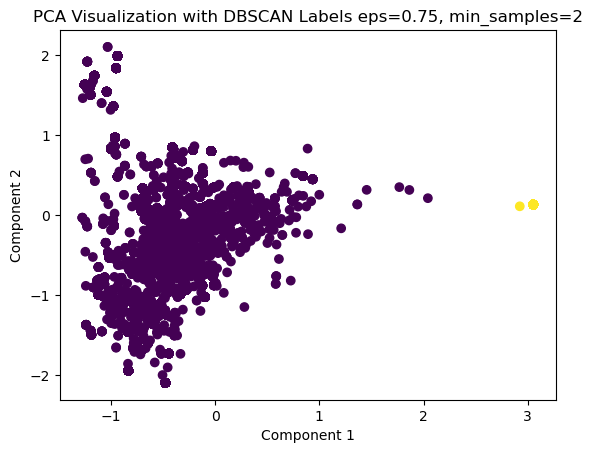

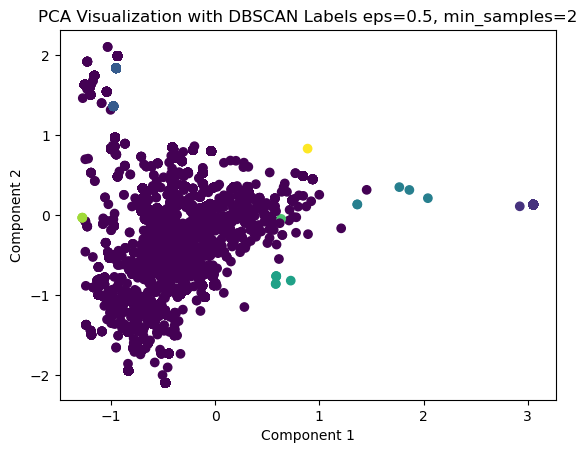

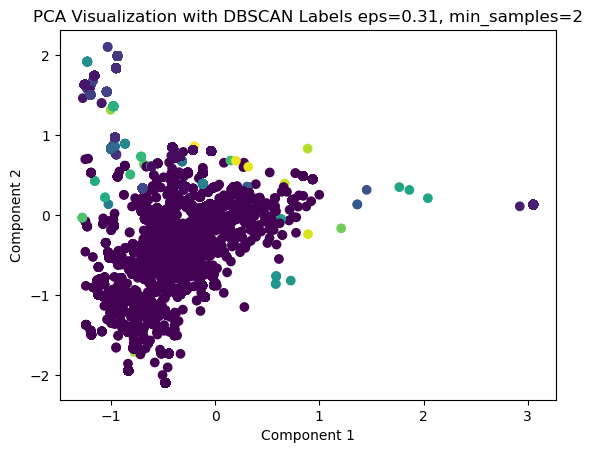

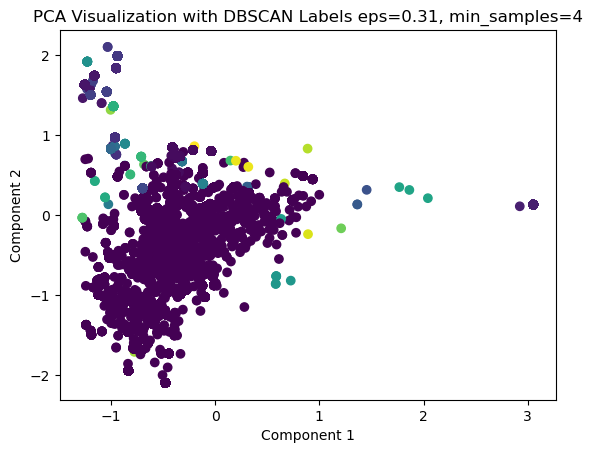

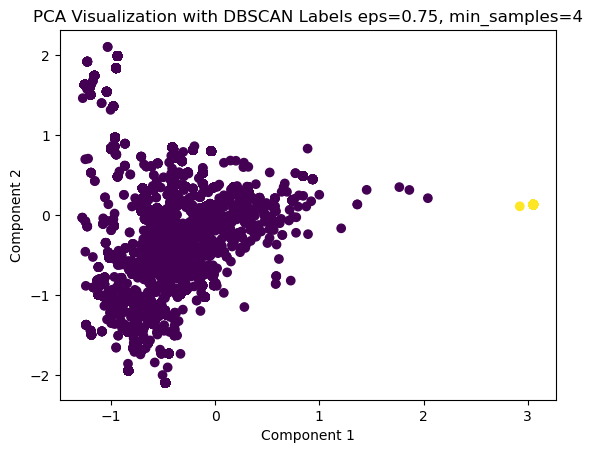

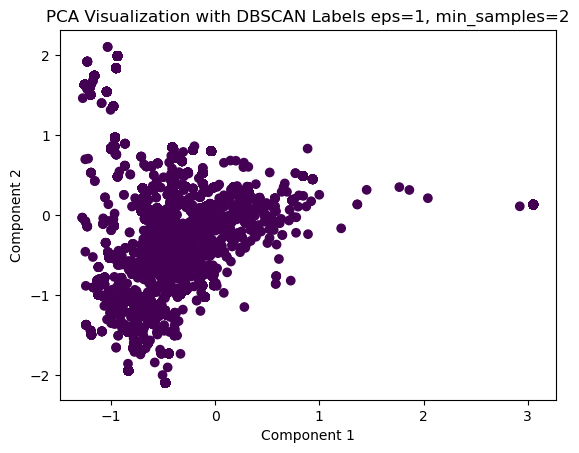

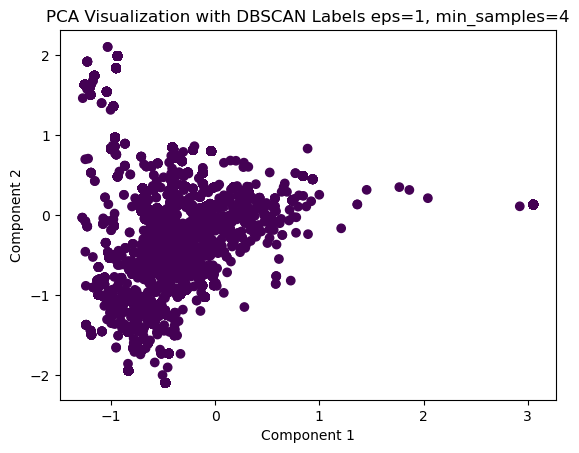

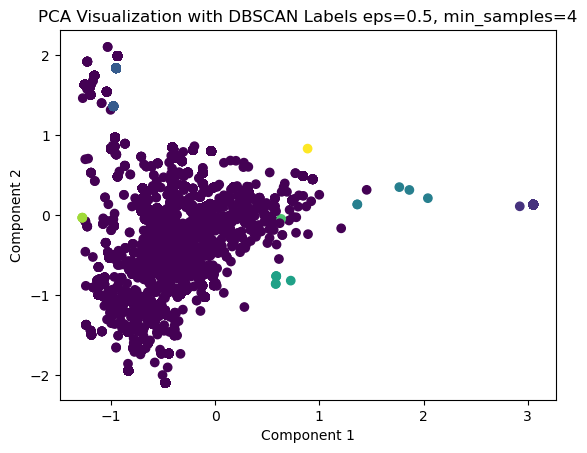

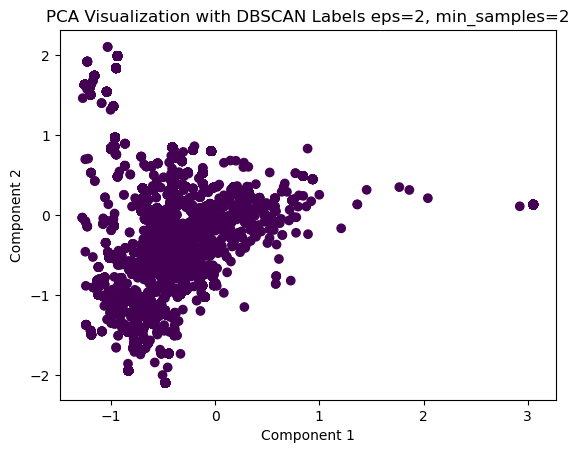

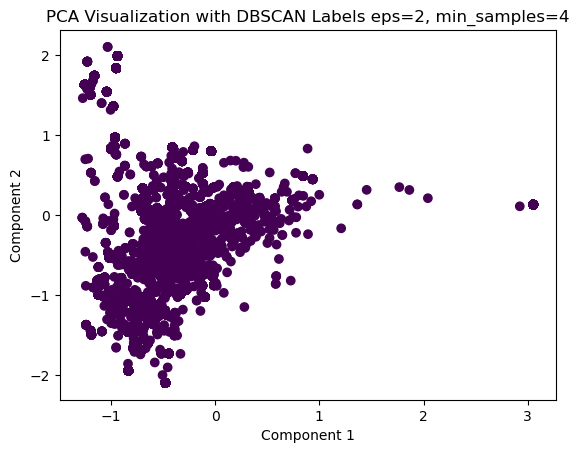

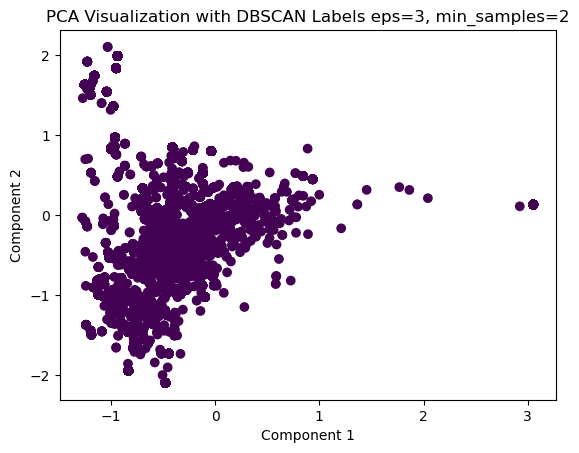

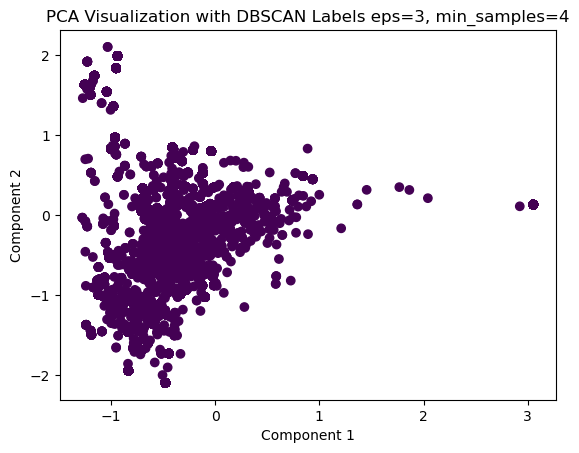

In [40]:
for i in range(0, len(eps)):
    # Plotting PCA visualization with DBSCAN labels
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=dbscan_pca_labels_collection[i])
    plt.title(f"PCA Visualization with DBSCAN Labels eps={eps[i]}, min_samples={min_samples[i]}")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [41]:
score_fail = []

# Try to compute the silhouette score for each combination of eps and min_samples
for i in range(0, len(eps)):
    try:
        score = silhouette_score(pca_df, dbscan_pca_labels_collection[i])
    except ValueError as e:
        print(f"Silhouette Score for DBSCAN with PCA eps={eps[i]}, min_samples={min_samples[i]}: -")
        note = f"Can't compute Silhouette Score for DBSCAN with PCA eps={eps[i]}, min_samples={min_samples[i]}: {e}"
        score_fail.append(note)
        continue

    scores[f"DBSCAN with PCA eps={eps[i]}, min_samples={min_samples[i]}"] = score
    print(f"Silhouette Score for DBSCAN with PCA eps={eps[i]}, min_samples={min_samples[i]}: {score}")


Silhouette Score for DBSCAN with PCA eps=0.75, min_samples=2: 0.5165822372993458
Silhouette Score for DBSCAN with PCA eps=0.5, min_samples=2: -0.08681181224379028
Silhouette Score for DBSCAN with PCA eps=0.31, min_samples=2: 0.21502794823914465
Silhouette Score for DBSCAN with PCA eps=0.31, min_samples=4: 0.21502794823914465
Silhouette Score for DBSCAN with PCA eps=0.75, min_samples=4: 0.5165822372993458
Silhouette Score for DBSCAN with PCA eps=1, min_samples=2: -
Silhouette Score for DBSCAN with PCA eps=1, min_samples=4: -
Silhouette Score for DBSCAN with PCA eps=0.5, min_samples=4: -0.08681181224379028
Silhouette Score for DBSCAN with PCA eps=2, min_samples=2: -
Silhouette Score for DBSCAN with PCA eps=2, min_samples=4: -
Silhouette Score for DBSCAN with PCA eps=3, min_samples=2: -
Silhouette Score for DBSCAN with PCA eps=3, min_samples=4: -


In [42]:
# Report any failed score attempts
for i in range(0, len(score_fail)):
    print(score_fail[i])

Can't compute Silhouette Score for DBSCAN with PCA eps=1, min_samples=2: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Can't compute Silhouette Score for DBSCAN with PCA eps=1, min_samples=4: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Can't compute Silhouette Score for DBSCAN with PCA eps=2, min_samples=2: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Can't compute Silhouette Score for DBSCAN with PCA eps=2, min_samples=4: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Can't compute Silhouette Score for DBSCAN with PCA eps=3, min_samples=2: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Can't compute Silhouette Score for DBSCAN with PCA eps=3, min_samples=4: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


# T-SNE

- Keep number of components for t-sne to less than 4, because the main idea of t-sne is to visualize high-dimesional dataset into 2D or 3D

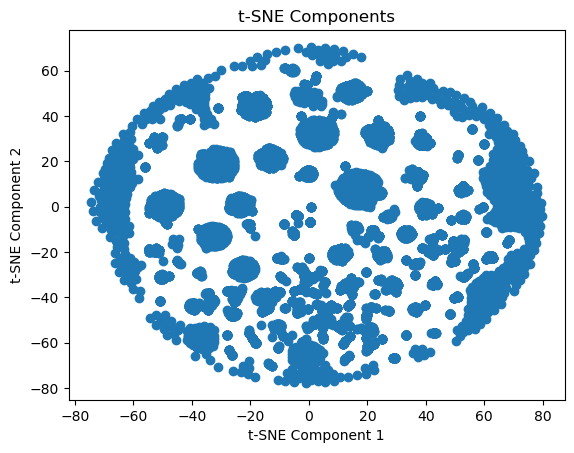

In [43]:
# creating t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# fitting t-SNE to standardized data
tsne_components = tsne.fit_transform(feature_matrix)

# plotting the t-SNE components
plt.scatter(tsne_components[:, 0], tsne_components[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Components")
plt.show()

In [44]:
# applying KMeans clustering to the t-SNE components
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_components)
    inertias.append(kmeans.inertia_)

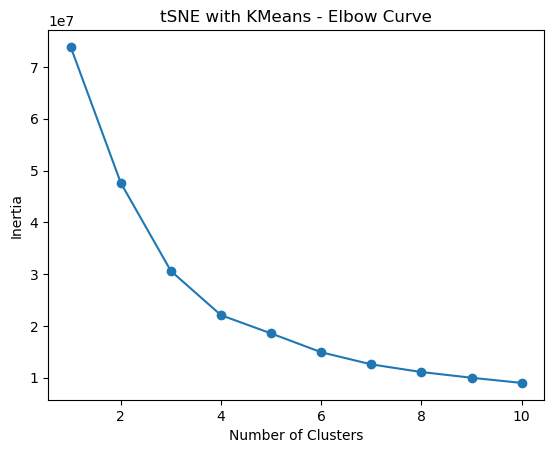

In [76]:
# plotting the elbow curve
plt.plot(range(1, 11), inertias, marker="o")
plt.title("tSNE with KMeans - Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [46]:
# choosing the appropriate number of clusters
k = 3

# performing KMeans clustering with chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
tsne_labels = kmeans.fit_predict(tsne_components)

In [47]:
# adding cluster labels to the sentence df
sentences_df["tSNE_CLUSTER"] = tsne_labels

In [48]:
sentences_df[["tSNE_CLUSTER", "SENTENCE"]]

tSNE_CLUSTER                                           SENTENCE
0                 0  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...
1                 0  THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...
2                 0  NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...
3                 2  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
4                 2    NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.
...             ...                                                ...
25681             2  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...
25682             2                  DATA WAS RECEIVED FOR EVALUATION.
25683             1  HOWEVER, THE ALLEGED PRODUCT IS NOT PRESENT WI...
25684             2  CONFIRMATION OF THE ALLEGATION AND A PROBABLE ...
25685             2    NO INJURY OR MEDICAL INTERVENTION WAS REPORTED.

[25686 rows x 2 columns]

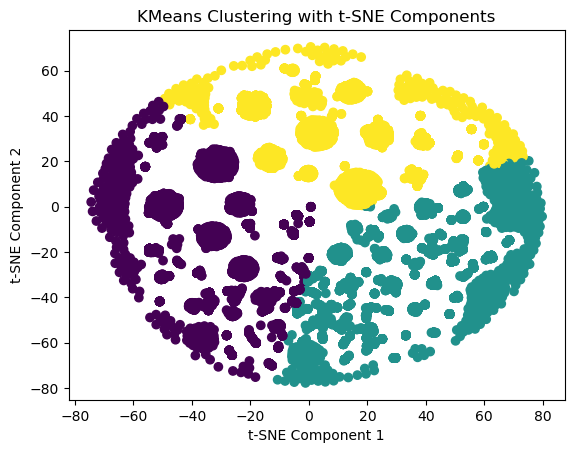

In [49]:
# ploting the data using t-SNE components and color by clustering labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=tsne_labels)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("KMeans Clustering with t-SNE Components")
plt.show()

In [50]:
# Compute the silhouette score
score = silhouette_score(tsne_components, tsne_labels)
scores["Kmeans with T-sne"] = score

print("Silhouette Score for Kmeans with T-sne: ",score)

Silhouette Score for Kmeans with T-sne:  0.3695673


# Applying DBSCAN after applying t-sne

## Build a k-distance graph to determine the optimal value of "EPS" using the elbow method

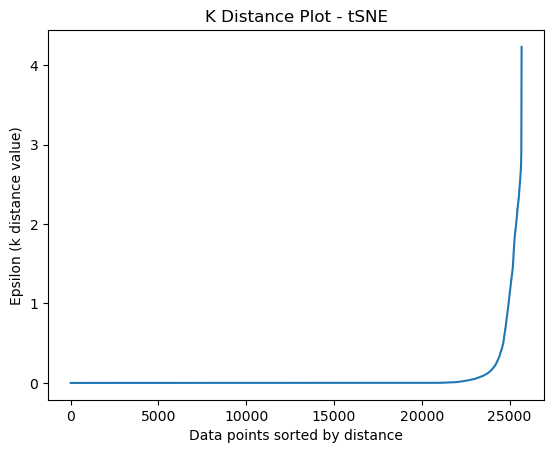

In [51]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(tsne_components)
distances, indices = neighbors_fit.kneighbors(tsne_components)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Data points sorted by distance")
plt.ylabel("Epsilon (k distance value)")
plt.title("K Distance Plot - tSNE")
plt.plot(distances)

In [52]:
import plotly.express as px

fig_2 = px.line(distances)

# set the limits of the y-axis to: 0 to 1
fig_2.update_yaxes(range=[0, 1])

# set the limits of the x-axis to: 23000 to 25000
fig_2.update_xaxes(range=[23000, 25000])

# add a horizontal rule for y = 0.31
fig_2.add_shape(type='line',
              x0=0,
              y0=0.31,
              x1=25000,
              y1=0.31,
              line=dict(color='red', width=2, dash='dash'))

fig_2.update_layout(
    title="K Distance Plot - tSNE",
    xaxis_title="Data points sorted by distance",
    yaxis_title="Epsilon (k distance value)",
    showlegend=False
)

# write the graph to a file in the working directory
fig_2.write_html(f"{working_directory}/dbscan_parameter_estimation_for_tsne_{TAG}.html")

# show the plot
fig_2.show()

## Perform DBSCAN clustering

In [53]:
dbscan = DBSCAN(eps=0.31, min_samples=4)
dbscan_labels = dbscan.fit_predict(tsne_components)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


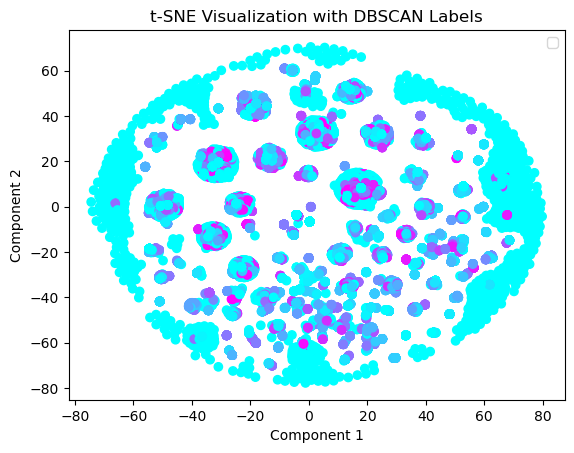

In [54]:
# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=dbscan_labels, cmap='cool')
plt.title('t-SNE Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [55]:
# Compute the silhouette score
score = silhouette_score(tsne_components, dbscan_labels)
scores["DBSCAN with T-sne"] = score

print("Silhouette Score for DBSCAN with T-sne: ",score)

Silhouette Score for DBSCAN with T-sne:  0.71539605


In [56]:
dbscan_clusters_number = np.unique(dbscan_labels)
print("Number of clusters find by dbscan {}".format(len(dbscan_clusters_number)))

Number of clusters find by dbscan 1016


In [57]:
# adding cluster labels to the sentence df
sentences_df["tSNE_with_DBSCAN_CLUSTER"] = dbscan_labels

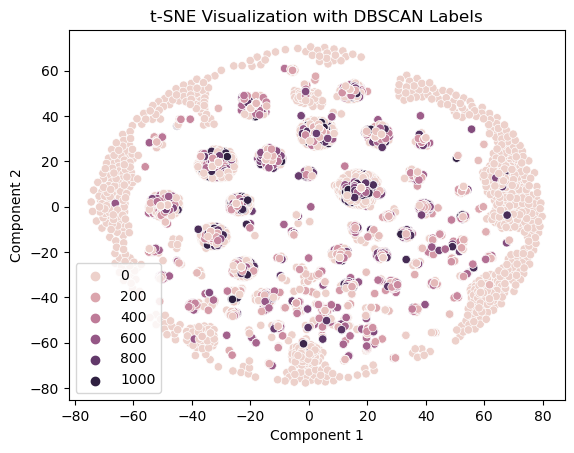

In [58]:
# Plot t-SNE visualization with  DBSCAN labels
sns.scatterplot(x= tsne_components[:, 0], y= tsne_components[:, 1], hue=dbscan_labels, cmap='cool')
plt.title('t-SNE Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Applying PCA, then t-sne, and then KMeans

In [59]:
# Applying PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
pca_data = pca.fit_transform(feature_matrix)

# Applying t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

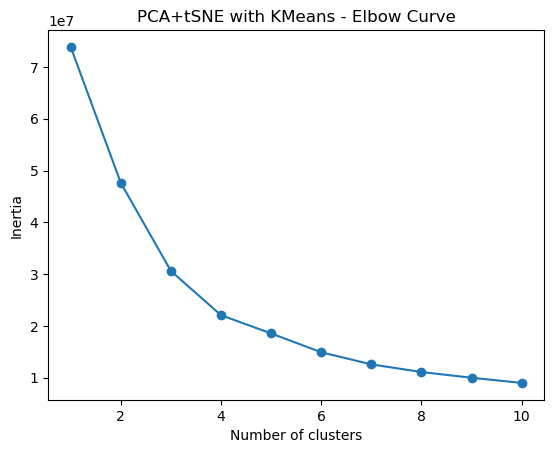

In [60]:
# Determining the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(tsne_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias,marker="o")
plt.title("PCA+tSNE with KMeans - Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

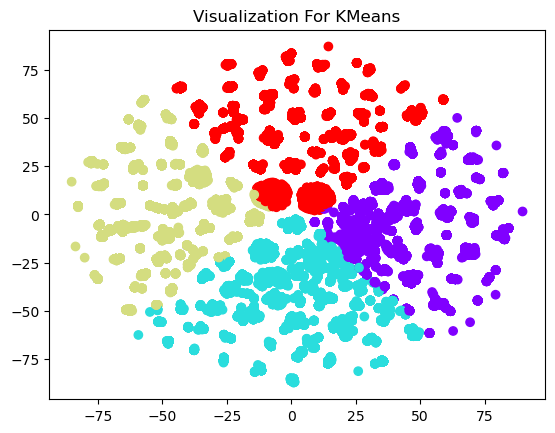

In [61]:
# Run k-means clustering with the optimal number of clusters
k = 4  # Change this to the optimal number of clusters determined by the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tsne_data)
pca_tsne_labels = kmeans.fit_predict(tsne_data)

# Plot the data points with the assigned cluster labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=pca_tsne_labels, cmap='rainbow')
plt.title('Visualization For KMeans')
plt.show()

In [62]:
# adding cluster labels to the sentence df
sentences_df["PCA_tSNE_CLUSTER"] = pca_tsne_labels

In [63]:
# Compute the silhouette score
score = silhouette_score(tsne_data, pca_tsne_labels)
scores["KMeans with PCA + T-sne"] = score

print("Silhouette Score for KMeans with PCA + T-sne: ",score)

Silhouette Score for KMeans with PCA + T-sne:  0.3571137


## Build a k-distance graph to determine the optimal value of "EPS" using the elbow method

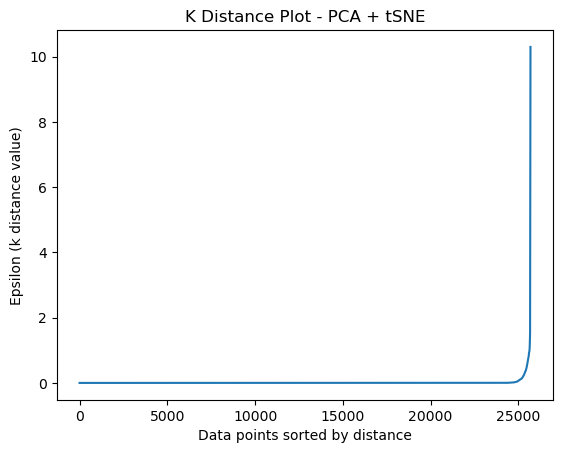

In [64]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(tsne_data)
distances, indices = neighbors_fit.kneighbors(tsne_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Data points sorted by distance")
plt.ylabel("Epsilon (k distance value)")
plt.title("K Distance Plot - PCA + tSNE")
plt.plot(distances)

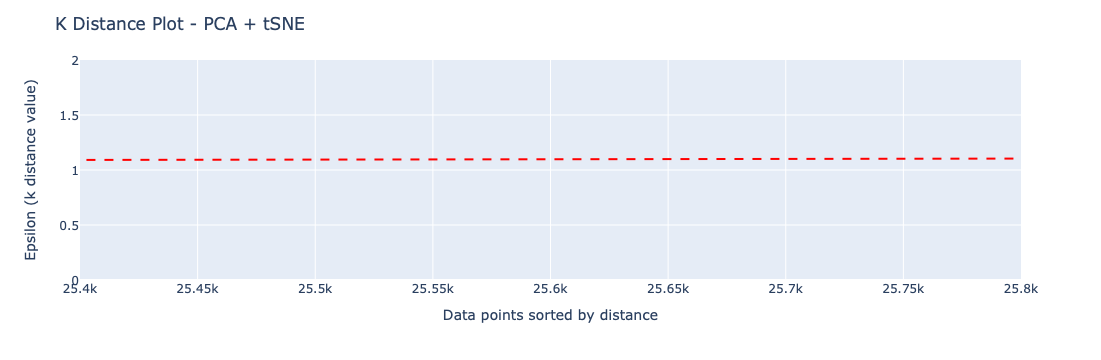

In [65]:
import plotly.express as px

fig_3 = px.line(distances)

# set the limits of the y-axis to: 0 to 1
fig_3.update_yaxes(range=[0, 2])

# set the limits of the x-axis to: 25400 to 25800
fig_3.update_xaxes(range=[25400, 25800])

# add a horizontal rule for y = 1.11
fig_3.add_shape(type='line',
              x0=0,
              y0=0.31,
              x1=26000,
              y1=1.11,
              line=dict(color='red', width=2, dash='dash'))

fig_3.update_layout(
    title="K Distance Plot - PCA + tSNE",
    xaxis_title="Data points sorted by distance",
    yaxis_title="Epsilon (k distance value)",
    showlegend=False
)

# write the graph to a file in the working directory
fig_3.write_html(f"{working_directory}/dbscan_parameter_estimation_for_pca_and_tsne_{TAG}.html")

# show the plot
fig_3.show()

In [66]:
# Performing DBSCAN clustering on the t-sne data
dbscan_pca_tsne = DBSCAN(eps=1.11, min_samples=4)
dbscan_labels_pca_tsne = dbscan_pca_tsne.fit_predict(tsne_data)

In [67]:
dbscan_labels_pca_tsne_clusters_number = np.unique(dbscan_labels_pca_tsne)
print("Number of clusters find by dbscan {}".format(len(dbscan_labels_pca_tsne_clusters_number)))

Number of clusters find by dbscan 675


In [68]:
# adding cluster labels to the sentence df
sentences_df["PCA_tSNE_with_DBSCAN_CLUSTER"] = dbscan_labels_pca_tsne

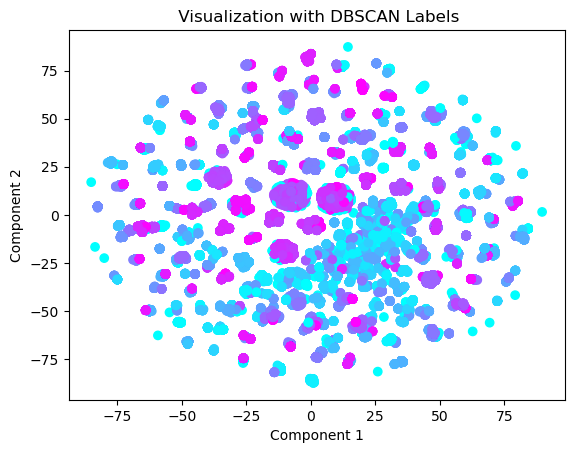

In [69]:
# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels_pca_tsne, cmap='cool')
plt.title(' Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [70]:
# Compute the silhouette score
score = silhouette_score(tsne_data, dbscan_labels_pca_tsne)
scores["DBSCAN with PCA + T-sne"] = score

print("Silhouette Score for DBSCAN with PCA + T-sne: ",score)

Silhouette Score for DBSCAN with PCA + T-sne:  0.838878


## Summary

In [71]:
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Value'])
scores_df.sort_values(by='Value', ascending=False)

Value
DBSCAN with PCA + T-sne                  0.838878
DBSCAN with T-sne                        0.715396
Kmeans with PCA                          0.622903
DBSCAN with PCA eps=0.75, min_samples=2  0.516582
DBSCAN with PCA eps=0.75, min_samples=4  0.516582
Kmeans with T-sne                        0.369567
KMeans with PCA + T-sne                  0.357114
DBSCAN with PCA eps=0.31, min_samples=2  0.215028
DBSCAN with PCA eps=0.31, min_samples=4  0.215028
DBSCAN with PCA eps=0.5, min_samples=2  -0.086812
DBSCAN with PCA eps=0.5, min_samples=4  -0.086812

In [72]:
print(f"Largest value is {scores_df.loc[scores_df['Value'].idxmax()]}")

Largest value is Value    0.838878
Name: DBSCAN with PCA + T-sne, dtype: float64


In [73]:
# Write the sentences dataframe to a CSV file
sentences_df.to_csv(f"{working_directory}/sentences_dataframe_{TAG}.csv", index=False)

# Write the sentences dataframe to a pickle
sentences_df.to_pickle(f"{working_directory}/sentences_dataframe_{TAG}.pickle")  

## Upload All Output to an S3 Bucket

In [74]:
from project_utilities import upload_to_s3

upload_to_s3()

upload: 33-PCA-tsne-KMeans-DBSCAN/dbscan_parameter_estimation_for_pca_and_tsne_2023_05_17_1684293753.html to s3://praxis-2023-html-output/33-PCA-tsne-KMeans-DBSCAN/dbscan_parameter_estimation_for_pca_and_tsne_2023_05_17_1684293753.html
upload: ./index.html to s3://praxis-2023-html-output/index.html
upload: 33-PCA-tsne-KMeans-DBSCAN/dbscan_parameter_estimation_for_tsne_2023_05_17_1684293753.html to s3://praxis-2023-html-output/33-PCA-tsne-KMeans-DBSCAN/dbscan_parameter_estimation_for_tsne_2023_05_17_1684293753.html
upload: 34-tsne-KMeans-DBSCAN-MacBook/dbscan_parameter_estimation_for_tsne_2023_05_17_1684293784.html to s3://praxis-2023-html-output/34-tsne-KMeans-DBSCAN-MacBook/dbscan_parameter_estimation_for_tsne_2023_05_17_1684293784.html
upload: 34-tsne-KMeans-DBSCAN-MacBook/dbscan_parameter_estimation_for_pca_and_tsne_2023_05_17_1684293784.html to s3://praxis-2023-html-output/34-tsne-KMeans-DBSCAN-MacBook/dbscan_parameter_estimation_for_pca_and_tsne_2023_05_17_1684293784.html
upload: 

In [75]:
! python --version

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Python 3.10.8
